In [207]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import csv
import statistics 
from statistics import mean
from scipy import stats
import matplotlib.animation as ani
from pylab import rcParams
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from cartopy import config
from cartopy.io import shapereader

In [168]:
conda install cartopy


CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://repo.anaconda.com/pkgs/main/osx-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.

If your current network has https://www.anaconda.com blocked, please file
a support request with your network engineering team.

'https://repo.anaconda.com/pkgs/main/osx-64'



Note: you may need to restart the kernel to use updated packages.


In [169]:
pip install cartopy 

Note: you may need to restart the kernel to use updated packages.


-----------------------------------------------------------
-----------------------------------------------------------

In [58]:
#RIVER DATA

In [124]:
RiverData=pd.read_csv('RiverData.csv', index_col='Year')
RiverData

,SSC,Flow
Year,,
1966.0,730.00,34.3
1967.0,907.60,72.8
1971.0,4110.00,78.0
1972.0,839.33,25.7
1973.0,535.88,94.7
...,...,...
2016.0,31.60,NaN
2017.0,36.40,NaN
2018.0,36.00,NaN


In [125]:
NewRiverData=RiverData.fillna(0)

In [126]:
SSC=RiverData['SSC']
SSC

Year
1966.0     730.00
1967.0     907.60
1971.0    4110.00
1972.0     839.33
1973.0     535.88
           ...   
2016.0      31.60
2017.0      36.40
2018.0      36.00
2019.0      42.80
2020.0      17.90
Name: SSC, Length: 11407, dtype: float64

In [127]:
SSC_max=np.max(SSC)
SSC_max

4110.0

In [ ]:
index=SSC.index(SSC_max)
print(index)

In [129]:
Flow=RiverData['Flow']
Flow

Year
1966.0    34.3
1967.0    72.8
1971.0    78.0
1972.0    25.7
1973.0    94.7
          ... 
2016.0     NaN
2017.0     NaN
2018.0     NaN
2019.0     NaN
2020.0     NaN
Name: Flow, Length: 11407, dtype: float64

In [130]:
np.max(Flow)

103.1

-----------------------------------------------------------
-----------------------------------------------------------

In [ ]:
#GRAPHING DATA

In [382]:
def myplot(mydataset, color1, color2): 
    """Assume data set has an index. Name of columns and data """
    
    fig, ax1=plt.subplots()

    
    ax1.plot(mydataset.index, mydataset['SSC'], color=color1) 
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Sediment (mg/L/yr)', color=color1)
    ax1.tick_params('y', labelcolor=color1)   

    ax2=ax1.twinx()
    ax2.plot(mydataset.index, mydataset['Flow'], color=color2)
    ax2.set_ylabel('Flow (m²/s)', color=color2)
    ax2.tick_params('y', labelcolor=color2)

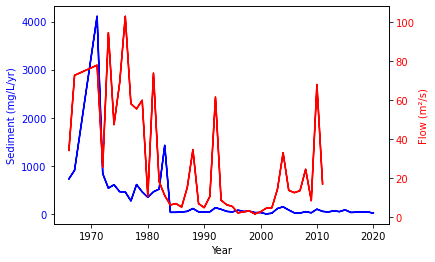

In [387]:
myplot(RiverData, 'blue', 'red')
plt.savefig('RiverData2.jpg')

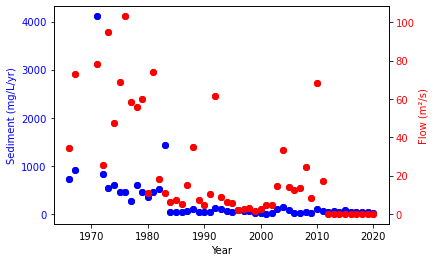

In [386]:

N=50
area = (30 * np.random.rand(N))**2

fig, ax1=plt.subplots()

x=1971.01    
ax1.scatter(NewRiverData.index, NewRiverData['SSC'], color='blue') 
ax1.set_xlabel('Year')
ax1.set_ylabel('Sediment (mg/L/yr)', color='blue')
ax1.tick_params('y', labelcolor='blue') 


ax2=ax1.twinx()
ax2.scatter(NewRiverData.index, NewRiverData['Flow'], color='red')
ax2.set_ylabel('Flow (m²/s)', color='red')
ax2.tick_params('y', labelcolor='red')

plt.savefig('RiverData1.jpg')


-----------------------------------------------------------
-----------------------------------------------------------

In [57]:
#MEAN, STANDARD DEVIATION & VARIANCE

In [66]:
np.mean(SSC)

283.7846153846155

In [67]:
np.std(SSC)
#SSC seems to be more spread out during this period.
    #The two points that are the furthest seemed to affect std.

609.044298942903

In [68]:
np.var(SSC)

#Two outlier are altering the data

370934.9580748521

-----------------------------------------------------------
-----------------------------------------------------------

In [69]:
np.mean(Flow)

28.23023255813952

In [71]:
np.std(Flow)

#Flow not constant through this period.
    

28.47636747545373

In [72]:
np.var(Flow)

#Data all over the place

810.9035045970792

-----------------------------------------------------------
-----------------------------------------------------------

In [166]:
def SSC_decades(mydata, istart):
    a=dec_avg=mydata.iloc[istart:istart+9,0]
    b=dec_avg=mydata.iloc[istart:istart+10,0]
    
    if istart == 2:
        return round(np.std(a),1) 
        
    else:
        return round(mean(b),1)

In [337]:
seventies=SSC_decades(RiverData,2)
seventies

928.5

In [338]:
eigthies=SSC_decades(RiverData,11)
eigthies

307.0

In [339]:
nineties=SSC_decades(RiverData,21)
nineties

62.9

In [340]:
twothousand=SSC_decades(RiverData,32)
twothousand

57.4

In [341]:
TwentyTen=SSC_decades(RiverData,42)
TwentyTen

45.9

In [136]:
def flow_decades(mydata, istart):
    a=dec_avg=mydata.iloc[istart:istart+9,1]
    b=dec_avg=mydata.iloc[istart:istart+10,1]
    
    if istart == 2:
        return round(mean(a),1)
       
    
    else:
        return round(mean(b),1)
       

In [342]:
seventiesFlow=flow_decades(RiverData,2)
seventiesFlow

65.7

In [344]:
eigthiesFlow=flow_decades(RiverData,11)
eigthiesFlow

18.9

In [345]:
ninetiesFlow=flow_decades(RiverData,21)
ninetiesFlow

10.8

In [346]:
twothousandsFlow=flow_decades(RiverData,32)
twothousandsFlow

19.8

In [362]:
decades={'DecadesSSC':{'1970s':298,'1980s':307,'1990s':63,'2000s':57,'2010s':46},
        'DecadesFlow':{'1970s':66,'1980s':19,'1990s':11,'2000s':20}}

In [379]:
river_decadesdf=pd.DataFrame(decades)
river_decadesdf
river_decadesdf=river_decadesdf.fillna(0)
river_decadesdf



,DecadesSSC,DecadesFlow
1970s,298,66.0
1980s,307,19.0
1990s,63,11.0
2000s,57,20.0
2010s,46,0.0


In [366]:
river_decadesdf.to_csv('river_decades.csv')

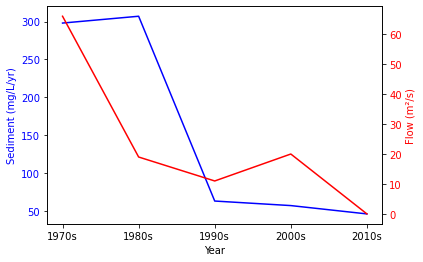

In [385]:
fig, ax1=plt.subplots()

    
ax1.plot(river_decadesdf.index, river_decadesdf['DecadesSSC'], color='blue') 
ax1.set_xlabel('Year')
ax1.set_ylabel('Sediment (mg/L/yr)', color='blue')
ax1.tick_params('y', labelcolor='blue')   

ax2=ax1.twinx()
ax2.plot(river_decadesdf.index, river_decadesdf['DecadesFlow'], color='red')
ax2.set_ylabel('Flow (m²/s)', color='red')
ax2.tick_params('y', labelcolor='red')

plt.savefig('RiverDecades.jpg')

In [ ]:
_________________________________________________________________________________________________________
_________________________________________________________________________________________________________

In [ ]:
#MAP

In [245]:
fpath =config['data_dir'] + '/Users/edoardodavila/Downloads/ne_110m_rivers_lake_centerlines/ne_110m_rivers_lake_centerlines.shp'

In [ ]:
fpath

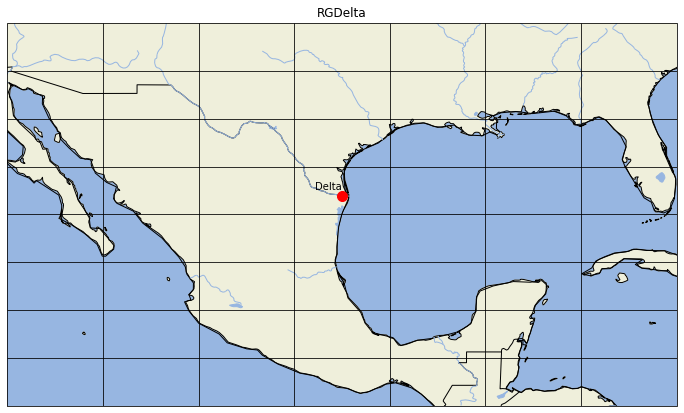

In [327]:
plt.figure(figsize=(12, 9))

ax = plt.axes(projection=ccrs.PlateCarree())
plt.title('RGDelta')
ax.set_extent([-80,-115,35,15], ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.gridlines(color='black')

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)


plt.plot(-97.5110, 25.9815, markersize=10, marker='o', color='red')
plt.text(-97.5110, 26.2815, 'Delta', horizontalalignment='right', transform=ccrs.PlateCarree())
plt.savefig('delta.png')
plt.show()